In [177]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from seis2GR import seis2GR
import pandas as pd

# Applied Seismology (GEOS 626) - University of Alaska Fairbanks
# Python adaptation of the Gutenberg-Richter frequency-magnitude relationship HW by Carl Tape
# Explores the relationship between cumulative and regular distributions using the GCMT catalog as an example.
# See Pacheco, Scholz, Sykes (1992 Nature) for details on the two segments of the GCMT distribution

# Calls seis2GR.py

# Run this cell at the beginning of each session

In [178]:
data = pd.read_csv('/import/freenas-m-05-seissol/kutschera/BAthesis_fkutschera/GMT_Iceland/src_Reloc3D.out', sep='\s+')
print(data.keys()) # This allows you to see what variables are in your dictionary
data.head()

Index(['#', 'Date', 'Time', 'Longitude', 'Latitude', 'Depth', 'M', '-', '-.1',
       '-.2', 'Ex', 'Ey', 'Ez'],
      dtype='object')


,#,Date,Time,Longitude,Latitude,Depth,M,-,-.1,-.2,Ex,Ey,Ez
0,931217,846,8.3001,-17.224992,66.291146,9.0440,1.95,4,8,0,0.34,0.45,5.19
1,931218,502,42.0063,-17.725355,66.180403,11.3765,0.86,3,6,0,2.75,3.01,22.12
2,931218,825,27.9227,-17.920537,66.660361,9.4955,1.50,4,8,0,0.30,0.31,0.37
3,931219,416,58.7181,-18.132627,66.201880,6.2665,1.20,3,6,0,1.64,0.77,2.37
4,931226,1347,13.5777,-18.578012,66.253185,18.5727,1.43,4,7,0,0.84,0.50,1.74


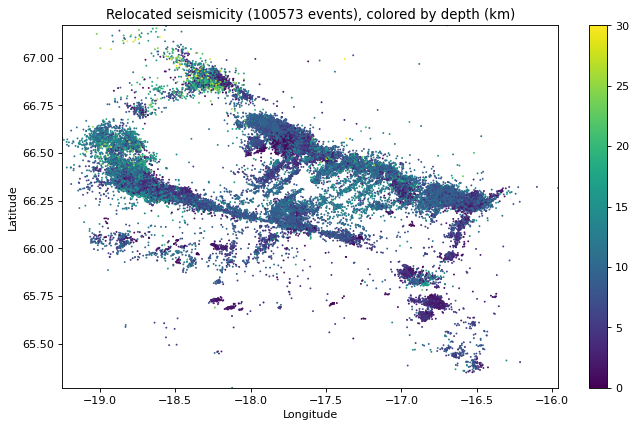

In [179]:
Mw = data['M']
dep = data['Depth']
lat = data['Latitude']
lon = data['Longitude']

#lon[lon<0] = lon[lon<0] + 360 # center map on 180 deg
title = 'Relocated seismicity (' + str(len(dep)) + ' events), colored by depth (km)'

plt.figure(figsize=(10,6),dpi=80)
plt.scatter(lon,lat,s=0.5,c=dep,cmap='viridis',vmin=0,vmax=30)
plt.xlim(min(lon),max(lon))
plt.ylim(min(lat),max(lat))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(title)
plt.colorbar()
plt.show()

In [180]:
print("Range of depth is from {} km until {} km".format(dep.min(), dep.max()))

print("Range of (moment) magnitudes is from {:.2f} until {:.2f}".format(Mw.min(), Mw.max()))

Range of depth is from 0.0029 km until 34.6297 km
Range of (moment) magnitudes is from -9.00 until 5.65


In [181]:
# Problem 1-2

dmag = 0.1 # Magnitude bin width

# Note: seis2GR is a homebrewed function. You must have it in your working directory
# Note: Python is 0-indexed, i.e. 'bin 0' is the first bin in the array

N, Ninc, Medges = seis2GR(Mw,0.1)

seis2GR: 100573 events, min M = -9.000, max M = 5.650
bin  0 : Mw = [ -9.0   -8.9 ] Ninc =  103 N =  100573
bin  1 : Mw = [ -8.9   -8.8 ] Ninc =  0 N =  100470
bin  2 : Mw = [ -8.8   -8.7 ] Ninc =  0 N =  100470
bin  3 : Mw = [ -8.7   -8.6 ] Ninc =  0 N =  100470
bin  4 : Mw = [ -8.6   -8.5 ] Ninc =  0 N =  100470
bin  5 : Mw = [ -8.5   -8.4 ] Ninc =  0 N =  100470
bin  6 : Mw = [ -8.4   -8.3 ] Ninc =  0 N =  100470
bin  7 : Mw = [ -8.3   -8.2 ] Ninc =  0 N =  100470
bin  8 : Mw = [ -8.2   -8.1 ] Ninc =  0 N =  100470
bin  9 : Mw = [ -8.1   -8.0 ] Ninc =  0 N =  100470
bin  10 : Mw = [ -8.0   -7.9 ] Ninc =  0 N =  100470
bin  11 : Mw = [ -7.9   -7.8 ] Ninc =  0 N =  100470
bin  12 : Mw = [ -7.8   -7.7 ] Ninc =  0 N =  100470
bin  13 : Mw = [ -7.7   -7.6 ] Ninc =  0 N =  100470
bin  14 : Mw = [ -7.6   -7.5 ] Ninc =  0 N =  100470
bin  15 : Mw = [ -7.5   -7.4 ] Ninc =  0 N =  100470
bin  16 : Mw = [ -7.4   -7.3 ] Ninc =  0 N =  100470
bin  17 : Mw = [ -7.3   -7.2 ] Ninc =  0 N =  100470


In [182]:
print("Maximum value of incremental distribution Ninc = {}".format(Ninc.max()))

print("Maximum value of cumulative distribution N = {}".format(N.max()))

print("Minumum value of incremental distribution Ninc = {}".format(Ninc.min()))

print("Minimum value of cumulative distribution N = {}".format(N.min()))

Maximum value of incremental distribution Ninc = 7799
Maximum value of cumulative distribution N = 100573
Minumum value of incremental distribution Ninc = 0
Minimum value of cumulative distribution N = 3


In [183]:
print(Medges)

print("{}, {}, {}".format(Medges.shape, N.shape, Ninc.shape))

[-9.  -8.9 -8.8 -8.7 -8.6 -8.5 -8.4 -8.3 -8.2 -8.1 -8.  -7.9 -7.8 -7.7
 -7.6 -7.5 -7.4 -7.3 -7.2 -7.1 -7.  -6.9 -6.8 -6.7 -6.6 -6.5 -6.4 -6.3
 -6.2 -6.1 -6.  -5.9 -5.8 -5.7 -5.6 -5.5 -5.4 -5.3 -5.2 -5.1 -5.  -4.9
 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7 -3.6 -3.5
 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1
 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7
 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1 -0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7
  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1
  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5
  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9
  5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7]
(148,), (147,), (147,)


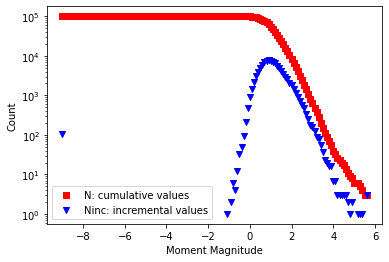

In [184]:
# Problem 1-3
# Start your work here
# 1-3 a
plt.figure()
plt.scatter(Medges[:-1], N, label='N: cumulative values', color='r', marker='s')
plt.scatter(Medges[:-1], Ninc, label='Ninc: incremental values', color='b', marker='v')
plt.yscale("log")
plt.xlabel('Moment Magnitude')
plt.ylabel('Count')
plt.legend()
plt.show()

In [185]:
Mc = 1
Mmax = 5

Mc_index = np.where(Medges==Mc)
Mmax_index = np.where(Medges==Mmax)
print("Mc = {} and maximum Moment Magnitude used for GR line fit is {}".format(Mc_index,Mmax_index))

index = np.where((Medges >= Mc) & (Medges <= Mmax))
print(index)

Mc = (array([100]),) and maximum Moment Magnitude used for GR line fit is (array([140]),)
(array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140]),)


b value = 1.054 ± 0.010 for: 1 <= Mw <= 5.
The intercept is at Mw 5.948.


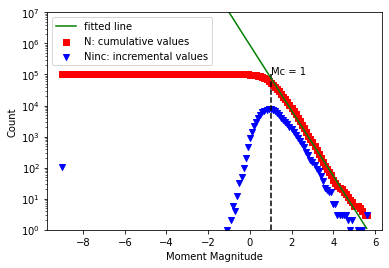

In [186]:
# 1-3 b Slope
# check inbetween mag 1 and 5
from scipy.stats import linregress
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

res = linregress(Medges[index], np.log10(N[index]))

print("b value = {:.3f} \u00B1 {:.3f} for: {} <= Mw <= {}.\nThe intercept is at Mw {:.3f}.".format(-res.slope, res.stderr, Mc, Mmax, res.intercept))

Nlin = (res.intercept + res.slope*Medges[:-1])

# Don't forget to take the y values to the power of 10
plt.plot(Medges[:-1], 10**Nlin, 'g', label='fitted line')

plt.scatter(Medges[:-1], N, label='N: cumulative values', color='r', marker='s')
plt.scatter(Medges[:-1], Ninc, label='Ninc: incremental values', color='b', marker='v')
plt.yscale("log")
plt.xlabel('Moment Magnitude')
plt.ylabel('Count')
plt.ylim(1,1e7)
plt.legend()
plt.vlines(Mc, 1, 1e5, colors='k', linestyles='dashed')
plt.text(x=Mc, y=1e5, s='Mc = {}'.format(Mc))
plt.show()

In [187]:
# 1-3 c Largest expected earthquake
n = 1
Mmax = (n - res.intercept)/ res.slope
print(Mmax)

4.695205220779729


In [188]:
t1 = pd.to_datetime('17/12/1993')
t2 = pd.to_datetime('02/10/2019')
(t2 - t1)
9186/365 #years

25.167123287671235